<a href="https://colab.research.google.com/github/Tessellate-Imaging/monk_v1/blob/master/study_roadmaps/4_image_classification_zoo/Classifier%20-%20Snake%20Species.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Table of contents


## Install Monk


## Using pretrained model for snake species classification


## Training a classifier from scratch

<a id='0'></a>
# Install Monk

## Using pip (Recommended)

  - colab (gpu) 
      - All bakcends: `pip install -U monk-colab`
      

  - kaggle (gpu) 
      - All backends: `pip install -U monk-kaggle`
      

  - cuda 10.2	
      - All backends: `pip install -U monk-cuda102`
      - Gluon bakcned: `pip install -U monk-gluon-cuda102`
	  - Pytorch backend: `pip install -U monk-pytorch-cuda102`
      - Keras backend: `pip install -U monk-keras-cuda102`
      

  - cuda 10.1	
      - All backend: `pip install -U monk-cuda101`
	  - Gluon bakcned: `pip install -U monk-gluon-cuda101`
	  - Pytorch backend: `pip install -U monk-pytorch-cuda101`
	  - Keras backend: `pip install -U monk-keras-cuda101`
      

  - cuda 10.0	
      - All backend: `pip install -U monk-cuda100`
	  - Gluon bakcned: `pip install -U monk-gluon-cuda100`
	  - Pytorch backend: `pip install -U monk-pytorch-cuda100`
	  - Keras backend: `pip install -U monk-keras-cuda100`
      

  - cuda 9.2	
      - All backend: `pip install -U monk-cuda92`
	  - Gluon bakcned: `pip install -U monk-gluon-cuda92`
	  - Pytorch backend: `pip install -U monk-pytorch-cuda92`
	  - Keras backend: `pip install -U monk-keras-cuda92`
      

  - cuda 9.0	
      - All backend: `pip install -U monk-cuda90`
	  - Gluon bakcned: `pip install -U monk-gluon-cuda90`
	  - Pytorch backend: `pip install -U monk-pytorch-cuda90`
	  - Keras backend: `pip install -U monk-keras-cuda90`
      

  - cpu 		
      - All backend: `pip install -U monk-cpu`
	  - Gluon bakcned: `pip install -U monk-gluon-cpu`
	  - Pytorch backend: `pip install -U monk-pytorch-cpu`
	  - Keras backend: `pip install -U monk-keras-cpu`

## Install Monk Manually (Not recommended)
 
### Step 1: Clone the library
 - git clone https://github.com/Tessellate-Imaging/monk_v1.git
 
 
 
 
### Step 2: Install requirements 
 - Linux
     - Cuda 9.0
         - `cd monk_v1/installation/Linux && pip install -r requirements_cu90.txt`
     - Cuda 9.2
         - `cd monk_v1/installation/Linux && pip install -r requirements_cu92.txt`
     - Cuda 10.0
         - `cd monk_v1/installation/Linux && pip install -r requirements_cu100.txt`
     - Cuda 10.1
         - `cd monk_v1/installation/Linux && pip install -r requirements_cu101.txt`
     - Cuda 10.2
         - `cd monk_v1/installation/Linux && pip install -r requirements_cu102.txt`
     - CPU (Non gpu system)
         - `cd monk_v1/installation/Linux && pip install -r requirements_cpu.txt`
 
 
  - Windows
     - Cuda 9.0 (Experimental support)
         - `cd monk_v1/installation/Windows && pip install -r requirements_cu90.txt`
     - Cuda 9.2 (Experimental support)
         - `cd monk_v1/installation/Windows && pip install -r requirements_cu92.txt`
     - Cuda 10.0 (Experimental support)
         - `cd monk_v1/installation/Windows && pip install -r requirements_cu100.txt`
     - Cuda 10.1 (Experimental support)
         - `cd monk_v1/installation/Windows && pip install -r requirements_cu101.txt`
     - Cuda 10.2 (Experimental support)
         - `cd monk_v1/installation/Windows && pip install -r requirements_cu102.txt`
     - CPU (Non gpu system)
         - `cd monk_v1/installation/Windows && pip install -r requirements_cpu.txt`
         
         
  - Mac
     - CPU (Non gpu system)
         - `cd monk_v1/installation/Mac && pip install -r requirements_cpu.txt`
         
         
  - Misc
      - Colab (GPU)
          - `cd monk_v1/installation/Misc && pip install -r requirements_colab.txt`
      - Kaggle (GPU)
          - `cd monk_v1/installation/Misc && pip install -r requirements_kaggle.txt`
 
 
 
### Step 3: Add to system path (Required for every terminal or kernel run)
 - `import sys`
 - `sys.path.append("monk_v1/");`

# Download Dataset 
    - Dataset credits - https://www.aicrowd.com/challenges/snake-species-identification-challenge
    
    Note: Download only for training and validatin purposes

In [ ]:
! wget https://s3.eu-central-1.wasabisys.com/aicrowd-public-datasets/snakes-challenge/round-4/train_images.tar.gz

In [ ]:
! wget https://s3.eu-central-1.wasabisys.com/aicrowd-public-datasets/snakes-challenge/round-4/train_labels.tar.gz

In [ ]:
! wget https://s3.eu-central-1.wasabisys.com/aicrowd-public-datasets/snakes-challenge/round-4/validate_images.tar.gz

In [ ]:
! wget https://s3.eu-central-1.wasabisys.com/aicrowd-public-datasets/snakes-challenge/round-4/validate_labels.tar.gz

In [ ]:
! tar -xvzf train_images.tar.gz

In [ ]:
! tar -xvzf train_labels.tar.gz

In [ ]:
! tar -xvzf validate_images.tar.gz

In [ ]:
! tar -xvzf validate_labels.tar.gz

## Modify dataset labels for monk engine

In [ ]:
import os
import sys
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("dataset/train_labels.csv")

In [ ]:
from tqdm import tqdm

combined = [];
total_labels = [];
for i in tqdm(range(len(df))):
    name = df["hashed_id"][i] + ".jpg";
    label = df["scientific_name"][i];
    if(label not in total_labels):
        total_labels.append(label);
    if(os.path.isfile("dataset/train_images/" + name)):
        combined.append([name, label]);

In [ ]:
df = pd.DataFrame(combined, columns = ['Id', 'Label']);

In [ ]:
df.to_csv("dataset/train_labels_updated.csv", index=False)

In [ ]:
df = pd.read_csv("dataset/validate_labels.csv")

In [ ]:
from tqdm import tqdm

combined = [];
total_labels = [];
for i in tqdm(range(len(df))):
    name = df["hashed_id"][i] + ".jpg";
    label = df["scientific_name"][i];
    if(label not in total_labels):
        total_labels.append(label);
    combined.append([name, label]);

In [ ]:
df = pd.DataFrame(combined, columns = ['Id', 'Label']);

In [ ]:
df.to_csv("dataset/validate_labels_updated.csv", index=False)

# Used trained classifier for validation
    - Using resnet50  - 58.84 %
    - Using resnet101 - 60.78 %
    - Using resnet152 - 62.44 %

In [1]:
#Using pytorch backend 

# When installed using pip
from monk.pytorch_prototype import prototype


# When installed manually (Uncomment the following)
#import os
#import sys
#sys.path.append("monk_v1/");
#sys.path.append("monk_v1/monk/");
#from monk.pytorch_prototype import prototype

In [2]:
# Download trained weights

In [ ]:
! wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1XuCFEYNhXh-qQ7IcA9D41eqU-tzotXUU' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1XuCFEYNhXh-qQ7IcA9D41eqU-tzotXUU" -O cls_snakes_trained.zip && rm -rf /tmp/cookies.txt

In [4]:
! unzip -qq cls_snakes_trained.zip 

In [5]:
ls workspace/Project-Snakes/

Pytorch-Resnet101/  Pytorch-Resnet152/  Pytorch-Resnet18/  Pytorch-Resnet50/


In [6]:
# Load project in inference mode

gtf = prototype(verbose=1);
gtf.Prototype("Project-Snakes", "Pytorch-Resnet50", eval_infer=True);

#Other trained models - uncomment 
#gtf.Prototype("Project-Snakes", "Pytorch-Resnet101", eval_infer=True);
#gtf.Prototype("Project-Snakes", "Pytorch-Resnet152", eval_infer=True);

Pytorch Version: 1.4.0

Model Details
    Loading model - workspace/Project-Snakes/Pytorch-Resnet50/output/models/final
    Model loaded!

Experiment Details
    Project: Project-Snakes
    Experiment: Pytorch-Resnet50
    Dir: /home/ubuntu/Desktop/snakes/workspace/Project-Snakes/Pytorch-Resnet50/



In [ ]:
gtf.Dataset_Params(dataset_path="dataset/validate_images/",
                    path_to_csv="dataset/validate_labels_updated.csv");
gtf.Dataset();

In [ ]:
accuracy, class_based_accuracy = gtf.Evaluate();

# Used trained classifier for demo

In [8]:
#Using pytorch backend 

# When installed using pip
from monk.pytorch_prototype import prototype


# When installed manually (Uncomment the following)
#import os
#import sys
#sys.path.append("monk_v1/");
#sys.path.append("monk_v1/monk/");
#from monk.pytorch_prototype import prototype

In [ ]:
# Download trained weights

In [ ]:
! wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1XuCFEYNhXh-qQ7IcA9D41eqU-tzotXUU' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1XuCFEYNhXh-qQ7IcA9D41eqU-tzotXUU" -O cls_snakes_trained.zip && rm -rf /tmp/cookies.txt

In [ ]:
! unzip -qq cls_snakes_trained.zip 

In [9]:
# Load project in inference mode

gtf = prototype(verbose=1);
gtf.Prototype("Project-Snakes", "Pytorch-Resnet152", eval_infer=True);

#Other trained models - uncomment 
#gtf.Prototype("Project-Snakes", "Pytorch-Resnet101", eval_infer=True);
#gtf.Prototype("Project-Snakes", "Pytorch-Resnet50", eval_infer=True);

Pytorch Version: 1.4.0

Model Details
    Loading model - workspace/Project-Snakes/Pytorch-Resnet152/output/models/final
    Model loaded!

Experiment Details
    Project: Project-Snakes
    Experiment: Pytorch-Resnet152
    Dir: /home/ubuntu/Desktop/snakes/workspace/Project-Snakes/Pytorch-Resnet152/



In [10]:
# Infer

In [11]:
import cv2
def resize_for_display(img_name, img_name_resized):
    img = cv2.imread(img_name);
    img = cv2.resize(img, (640, 480))
    cv2.imwrite(img_name_resized, img);

Prediction
    Image name:         workspace/test/1.jpg
    Predicted class:      thamnophis-sirtalis
    Predicted score:      0.9967228770256042



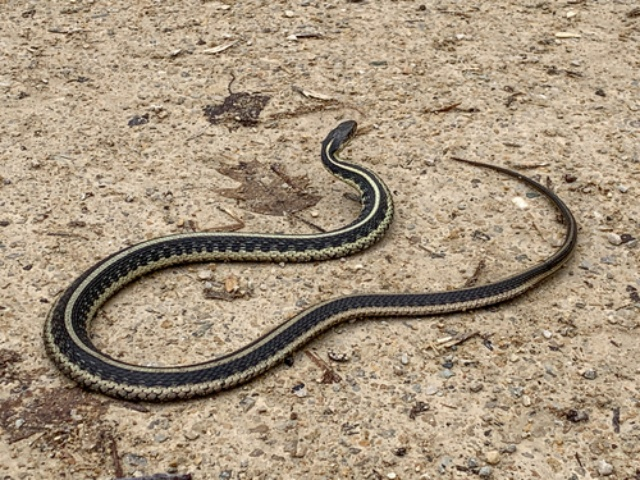

In [12]:
img_name = "workspace/test/1.jpg"
img_name_resized = "1_resized.jpg"
resize_for_display(img_name, img_name_resized)
predictions = gtf.Infer(img_name=img_name);
from IPython.display import Image
Image(filename=img_name_resized)

Prediction
    Image name:         workspace/test/2.jpg
    Predicted class:      nerodia-floridana
    Predicted score:      0.4155862331390381



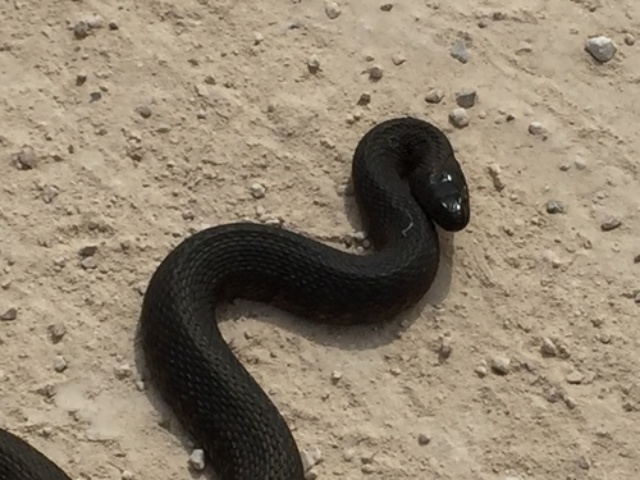

In [13]:
img_name = "workspace/test/2.jpg"
img_name_resized = "2_resized.jpg"
resize_for_display(img_name, img_name_resized)
predictions = gtf.Infer(img_name=img_name);
from IPython.display import Image
Image(filename=img_name_resized)

Prediction
    Image name:         workspace/test/3.jpg
    Predicted class:      ptyas-major
    Predicted score:      0.7125090956687927



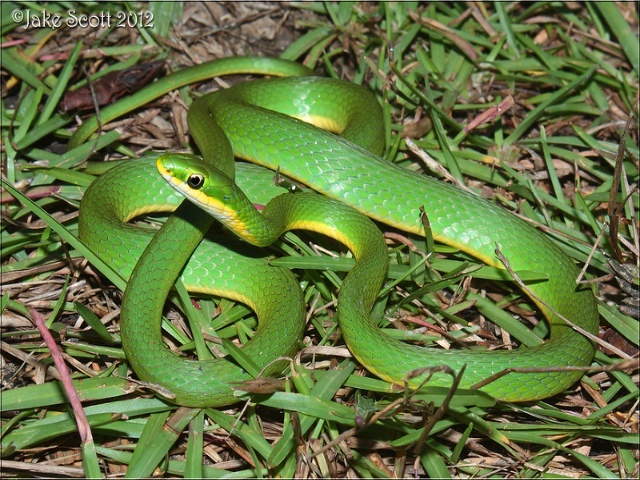

In [14]:
img_name = "workspace/test/3.jpg"
img_name_resized = "3_resized.jpg"
resize_for_display(img_name, img_name_resized)
predictions = gtf.Infer(img_name=img_name);
from IPython.display import Image
Image(filename=img_name_resized)

Prediction
    Image name:         workspace/test/4.jpg
    Predicted class:      anilius-scytale
    Predicted score:      0.9901270270347595



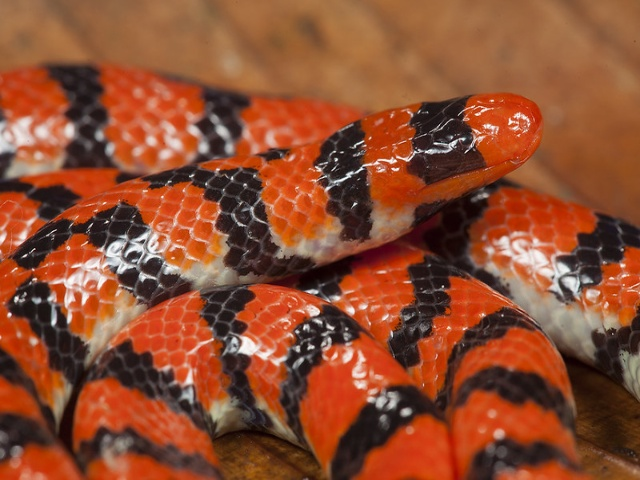

In [15]:
img_name = "workspace/test/4.jpg"
img_name_resized = "4_resized.jpg"
resize_for_display(img_name, img_name_resized)
predictions = gtf.Infer(img_name=img_name);
from IPython.display import Image
Image(filename=img_name_resized)

# Train your own classifier

In [ ]:
#Using pytorch backend 
from monk.pytorch_prototype import prototype

In [ ]:
gtf = prototype(verbose=1);
gtf.Prototype("Project-Snakes", "Pytorch-Resnet18");

In [ ]:
gtf.Default(dataset_path="dataset/train_images/",
            path_to_csv="dataset/train_labels_updated.csv",
            model_name="resnet18", 
            freeze_base_network=False,
            num_epochs=5);

In [ ]:
gtf.update_batch_size(32);
gtf.update_save_intermediate_models(False);

#Important to Reload expeirment post updates
gtf.Reload();

In [ ]:
gtf.Train();

## Run validation 

In [ ]:
#Using pytorch backend 
from monk.pytorch_prototype import prototype

In [ ]:
gtf = prototype(verbose=1);
gtf.Prototype("Project-Snakes", "Pytorch-Resnet18", eval_infer=True);

In [ ]:
gtf.Dataset_Params(dataset_path="dataset/validate_images/",
                    path_to_csv="dataset/validate_labels_updated.csv");
gtf.Dataset();

In [ ]:
accuracy, class_based_accuracy = gtf.Evaluate();